# **PyTerK** - A Python Iterated K-fold cross validation with shuffling  
----

## Example 1 - **manyfold()** using **keras** model


## Step 1 - Init python

In [1]:
import sys
sys.path.append('../..')

import pyterk.config       as config
import pyterk.task_manager as task_manager
import pyterk.reporter     as reporter

import pandas as pd

## Step 2 - Load settings
Settings are in a usefull and human readable yaml format :-)

In [9]:
settings = config.load('settings_example.yml',
                        datasets_dir_env='undef', run_dir_env='undef')

run_dir  = config.run_dir

<br>**Pyterk - A Python iterative KFold stuff...**

settings     : settings_example.yml
description  : Parameters for a first iteration campaign.
datasets_dir : .
run_dir      : ./run


## Step 3 - Add manyfold tasks

In [10]:
task_manager.reset()
task_manager.seed(settings)

task_manager.add_manyfold(settings    = settings, 
                          run_dir     = f'{run_dir}/Example-01',
                          dataset_id  = 'BHPD1', 
                          model_id    = 'keras-32x64x32', 
                          k_fold      = 8,
                          epochs      = 30, 
                          batch_size  = 10, 
                          description = 'Manyfold test',
                          save_xxtest = True,
                          save_yytest = True
                          )

All pending tasks have been removed.


<br>**Init random generators...**

With seed    : 123


<br>**Add manyfold taks...**

Directory          : ./run/Example-01
Description        : Manyfold test
Models to fit      : 8
Total pending tasks: 8


## Step 4 - Run tasks
On my laptop, with 8 cores : 6 to 8'

In [11]:
task_manager.run()

<br>**Run pending tasks...**

Number of cores   : 8
Number of workers : 8
Number of tasks   : 8 

o : job start    O : job end    . :job already done    + : results synthesis

oooooooo

TypeError: Object of type float32 is not JSON serializable

## Step 5 - Show report

In [7]:
reporter.show_report(   run_dir    = f'{run_dir}/Example-01', 
                        sections   = ['title','context','args','settings','evaluation', 'monitoring', 'history', 'distribution'],
                        context    = ['function', 'version', 'date', 'description', 'seed'],
                        args       = ['run_dir', 'dataset_id', 'model_id', 'n_iter', 'k_fold', 'epochs', 'batch_size'],
                        settings   = ['file', 'version', 'description', 'datasets_dir', 'run_dir'],
                        evaluation = ['all'],
                        monitoring = ['duration', 'used_data'],
                        history      = [ dict(metric='val_mae',    min=None,max=None, figsize=(8,6), savefig=True, mplstyle='pyterk') ],
                        distribution = [ dict(metric_id=2, bins=4, min=None,max=None, figsize=(8,6), savefig=True, mplstyle='pyterk') ],
                        correlation  = [ dict(axes_min='auto',axes_max='auto', figsize=(8,6), marker='.', markersize=8, alpha=0.7, color='auto', savefig=True, mplstyle='pyterk') ],
                        confusion    = [ dict(normalize='pred', figsize=(5,5), savefig=True, mplstyle='pyterk') ]
)



Report for : **./run/Example-01**

This report have **8** parts :

  - kfold-00
  - kfold-01
  - kfold-02
  - kfold-03
  - kfold-04
  - kfold-05
  - kfold-06
  - kfold-07

Report for : **./run/Example-01/kfold-00**

This report have **4** parts :

  - bestmodel.h5
  - history.json
  - xxtest.json
  - yytest.json

NotADirectoryError: [Errno 20] Not a directory: './run/Example-01/kfold-00/bestmodel.h5'

## Step 6 - Retrieve egression outliers (yy_deltamax)

FileNotFoundError: [Errno 2] No such file or directory: './run/Example-01/kfold-00/about.json'

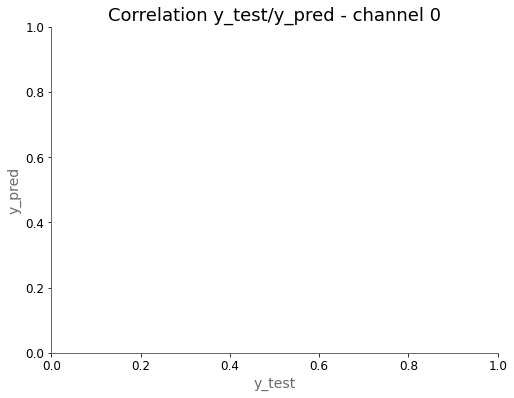

In [12]:
df = reporter.plot_kfold_correlation(f'{run_dir}/Example-01',channel=0, color='tomato', alpha=0.4, markersize=6, yy_deltamax=20)

In [7]:
print("Number of regression outliers : ", len(df))

with pd.option_context('display.max_colwidth', None):
    display(df)

df.to_csv(f'{run_dir}/Example-01/outliers-10.csv')
print('saved.')


Number of regression outliers :  46


,x,y,delta
37,"[-0.41843269533763616, -0.48203489992164217, -0.35734225529673735, -0.48203489992164217, -0.47768788010074076, -0.4392122767731113, 0.20687473888998656, -0.4739808573342954, -0.3166965866068513, 4.106103294563805, -0.3428751528816931, 2.0404077425871363, -0.4163818113428939]",50.0,32.980022
7,"[-0.4257899595121627, -0.48271701120860866, -0.3580831080720552, -0.4758311602065891, -0.4781172627392596, -0.4422626365717439, 0.13425523857234103, -0.4749387539167274, -0.31745658716013997, 4.103259756136397, -0.34362282096781416, 1.9127328353739448, -0.42157065431067525]",50.0,32.371885
6,"[-0.443674373744178, -0.48271701120860866, -0.3580831080720552, -0.4758311602065891, -0.4783720392263343, -0.43669886896211213, 0.18383336578688164, -0.47337497715416876, -0.31745658716013997, 4.103259756136397, -0.34362282096781416, 2.101749445379381, -0.4570327869710758]",50.0,31.437727
24,"[-0.44865734662616147, -0.48238387668732097, -0.3577569317752942, -0.48238387668732097, -0.47803914728182434, -0.44816310783578656, 0.2061627802852026, -0.4732089924831621, -0.31713267901391534, 4.103336858749686, -0.3432974519788712, 2.1032465295758995, -0.4599372556700167]",50.0,31.083038
15,"[-0.4382260558162148, -0.48334771465139287, -0.35844604752846376, -0.47644707005896586, -0.4789934079135714, -0.4349327921909249, 0.18946513311024166, -0.47505037959345864, -0.31773224443314435, 4.112481583905003, -0.34395469388436706, 2.2220499978096204, -0.4629218066578089]",50.0,30.598028
19,"[-0.4692564187400442, -0.483140925125496, -0.3479006567791472, -0.483140925125496, -0.4789621527889515, -0.42837483280076666, 0.18131841169364368, -0.4690097675662623, -0.44860561655901265, 2.300404945333062, -0.38160711794003493, 2.0676369655949642, -0.45758479678629826]",50.0,29.300087
18,"[-0.4726489602417641, -0.483140925125496, -0.3479006567791472, -0.4762338634121993, -0.4789621527889515, -0.4252942832766364, 0.16543216975306138, -0.46820785770134854, -0.44860561655901265, 2.300404945333062, -0.38160711794003493, 2.1999071974045954, -0.4602094802373511]",50.0,28.762962
20,"[-0.4723079603278479, -0.48238387668732097, -0.3475664412521009, -0.48238387668732097, -0.4782181694126372, -0.4308186175466487, 0.1428164878437304, -0.4688133106250495, -0.4479565438386948, 2.292459150911949, -0.38116751811236, 2.0957413710148987, -0.4704720195216963]",50.0,27.873402
1,"[-0.4700899442166353, -0.48271701120860866, -0.3478920485890663, -0.4758311602065891, -0.47855107135238684, -0.4289936016908523, 0.19347355718970902, -0.4686650550687874, -0.448287756198511, 2.2922809426052613, -0.38149500147892157, 2.20007939768822, -0.46949617728473114]",50.0,26.829834
42,"[-0.47946854878138295, -0.4830890767582658, -0.44048897151340594, -0.4830890767582658, -0.4796261004609417, -0.4231397351032009, 0.0872026547455031, -0.46320169859363314, -0.42812119902296275, 1.6263032313339878, -0.3635339426839817, 2.1416270851024533, -0.4512764175189592]",50.0,25.778927


saved.


---
### PyTerK 2021